# Data storytelling using matplotlib - line chart


In [2]:
import pandas as pd
import duckdb
from constants import GRAY_1, GRAY_2, GRAY_3, BLUE_1

df = pd.read_csv('data/norway_new_car_sales_by_make.csv')
df.head()

,Year,Month,Make,Quantity,Pct
0,2007,1,Toyota,2884,22.7
1,2007,1,Volkswagen,2521,19.9
2,2007,1,Peugeot,1029,8.1
3,2007,1,Ford,870,6.9
4,2007,1,Volvo,693,5.5


In [8]:
df_yearly_quantity = duckdb.query(
    """--sql
    SELECT
        year,
        SUM(quantity) AS Quantity
    FROM df
    GROUP BY year
    ORDER BY year
"""
).df().set_index("Year").iloc[:-1]

df_yearly_quantity

,Quantity
Year,
2007,129195.0
2008,110617.0
2009,98675.0
2010,127754.0
2011,138345.0
2012,137967.0
2013,142151.0
2014,144202.0
2015,150686.0


## Line chart


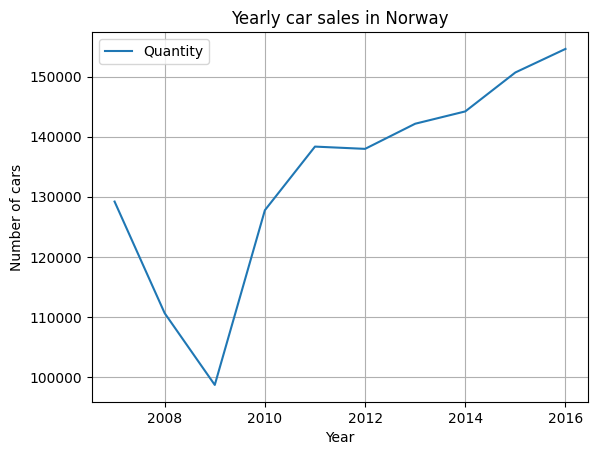

In [13]:
ax = df_yearly_quantity.plot(
    title="Yearly car sales in Norway", ylabel="Number of cars")
ax.grid()

# Storytelling on this graph

### remove clutter


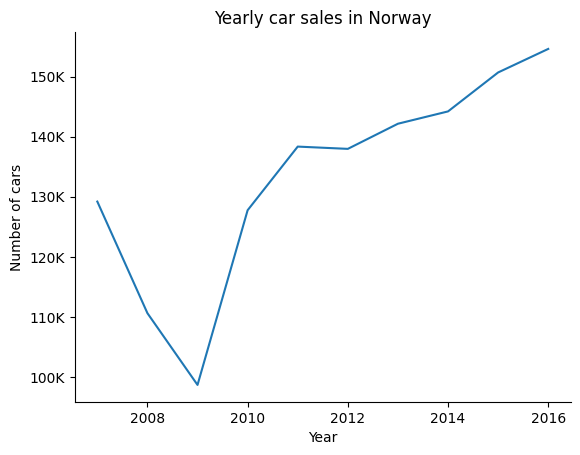

In [18]:
from matplotlib.ticker import FuncFormatter

ax = df_yearly_quantity.plot(
    title="Yearly car sales in Norway", ylabel="Number of cars")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

### contrast and descriptive title


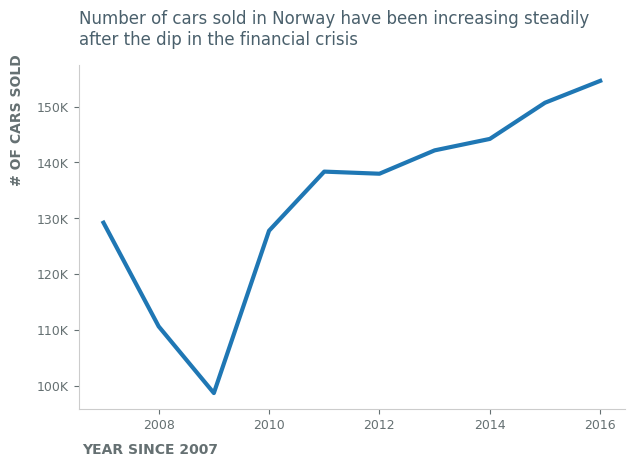

In [41]:
ax = df_yearly_quantity.plot(linewidth=3)

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize = 9)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color=GRAY_3,
    pad=15
)

ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2, fontweight = "bold")
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2, fontweight = "bold")

ax.xaxis.set_label_coords(0.13, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.84)

fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/storytelling_line_1.png")

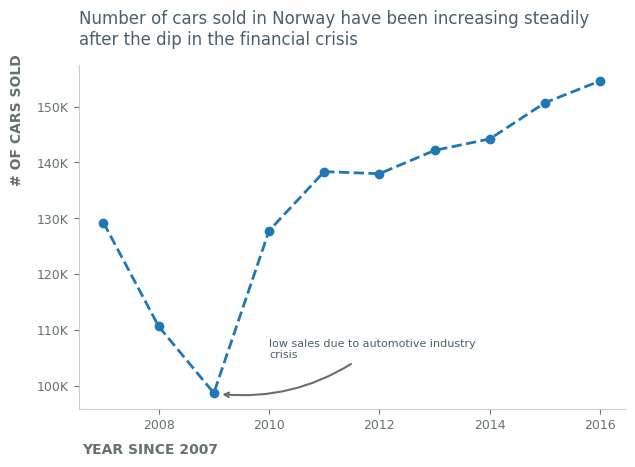

In [ ]:
ax = df_yearly_quantity.plot(linewidth=2, style="--o")

ax.legend().remove()
ax.spines[["top", "right"]].set_visible(False)
thousands_formatter = FuncFormatter(lambda val, pos: f"{int(val/1000)}K")
ax.yaxis.set_major_formatter(thousands_formatter)

ax.spines[["left", "bottom"]].set_color(GRAY_1)
ax.tick_params(axis="both", colors=GRAY_2, labelsize = 9)
ax.set_title(
    "Number of cars sold in Norway have been increasing steadily \nafter the dip in the financial crisis",
    loc="left",
    color=GRAY_3,
    pad=15
)

ax.set_xlabel("YEAR SINCE 2007", color=GRAY_2, fontweight = "bold")
ax.set_ylabel("# OF CARS SOLD", color=GRAY_2, fontweight = "bold")

ax.xaxis.set_label_coords(0.13, -0.1)
ax.yaxis.set_label_coords(-0.1, 0.84)

arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = f"arc3, rad=-.2",
    linewidth=1.5,
    color=GRAY_2)

ax.annotate(
    text= "low sales due to automotive industry\ncrisis",
    xy=(2009.1, 98500),
    fontsize=8,
    color=GRAY_3,
    arrowprops=arrowprops,
    xytext=(2010, 1.05e5))


fig = ax.get_figure()
fig.tight_layout()
fig.savefig("figures/storytelling_line_2.png")